In [1]:
%config IPCompleter.greedy=True

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv("D:/pyradiomics_analysis/results.csv")
print(list(df.columns))
df.head()


['Mask', 'Image', 'ID', 'general_info_BoundingBox', 'general_info_EnabledImageTypes', 'general_info_GeneralSettings', 'general_info_ImageHash', 'general_info_ImageSpacing', 'general_info_MaskHash', 'general_info_NumpyVersion', 'general_info_PyWaveletVersion', 'general_info_SimpleITKVersion', 'general_info_Version', 'general_info_VolumeNum', 'general_info_VoxelNum', 'original_shape_LeastAxis', 'original_shape_MinorAxis', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Elongation', 'original_shape_SurfaceArea', 'original_shape_Maximum3DDiameter', 'original_shape_SurfaceVolumeRatio', 'original_shape_Maximum2DDiameterRow', 'original_shape_Flatness', 'original_shape_Maximum2DDiameterSlice', 'original_shape_MajorAxis', 'original_shape_Volume', 'original_shape_Sphericity', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_RunPercentage', 'original_glrlm_RunVariance', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_g

,Mask,Image,ID,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_MaskHash,general_info_NumpyVersion,...,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_DependenceVariance,original_gldm_GrayLevelVariance,original_gldm_LowGrayLevelEmphasis,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceNonUniformity,original_gldm_SmallDependenceEmphasis,original_gldm_HighGrayLevelEmphasis,original_gldm_DependenceEntropy,original_gldm_SmallDependenceLowGrayLevelEmphasis
0,D:/niftyfolder/masks/N01mask.nii,D:/fullscans/N01/N01_2a.nii,N01_2_0,"(115, 180, 46, 69, 74, 49)",{'Original': {}},"{'removeOutliers': None, 'normalizeScale': 1, ...",c5997a52110a05763f4872962b5f01f546e495cd,"(1.0, 1.0, 1.0)",d0e9799b95f1691d7394eb3ca146a7e9584d52f8,1.14.0,...,69.481749,8.004592,83.149950,0.003870,0.117039,7753.215745,0.143467,609.565809,8.148659,0.000626
1,D:/niftyfolder/masks/N01mask.nii,D:/fullscans/N01/N01_3a.nii,N01_3_2,"(115, 180, 46, 69, 74, 49)",{'Original': {}},"{'removeOutliers': None, 'normalizeScale': 1, ...",61374d2e0b64c34711f3cb22507ddfe6aa727165,"(1.0, 1.0, 1.0)",d0e9799b95f1691d7394eb3ca146a7e9584d52f8,1.14.0,...,48.586621,9.673177,70.044810,0.004402,0.108488,7186.774564,0.115398,546.289697,8.187335,0.000619
2,D:/niftyfolder/masks/N01mask.nii,D:/fullscans/N01/N01_4a.nii,N01_4_9,"(115, 180, 46, 69, 74, 49)",{'Original': {}},"{'removeOutliers': None, 'normalizeScale': 1, ...",cbb97174081aa6b5b56dba5b443b90cbbdea6199,"(1.0, 1.0, 1.0)",d0e9799b95f1691d7394eb3ca146a7e9584d52f8,1.14.0,...,50.943582,11.262548,69.470358,0.004488,0.102575,6795.093592,0.123482,543.488278,8.209212,0.000665
3,D:/niftyfolder/masks/N01mask.nii,D:/fullscans/N01/N01_5a.nii,N01_5_16,"(115, 180, 46, 69, 74, 49)",{'Original': {}},"{'removeOutliers': None, 'normalizeScale': 1, ...",d991c69f46c0d18d581aeba6189e979999bfd77c,"(1.0, 1.0, 1.0)",d0e9799b95f1691d7394eb3ca146a7e9584d52f8,1.14.0,...,64.301538,7.780606,61.321609,0.002142,0.115065,7622.484882,0.102212,753.401132,8.206139,0.000276
4,D:/niftyfolder/masks/N01mask.nii,D:/fullscans/N01/N01_6a.nii,N01_6_17,"(115, 180, 46, 69, 74, 49)",{'Original': {}},"{'removeOutliers': None, 'normalizeScale': 1, ...",055758e545cca82cefbb49ef47a3c908440c7146,"(1.0, 1.0, 1.0)",d0e9799b95f1691d7394eb3ca146a7e9584d52f8,1.14.0,...,52.823853,11.027605,64.794964,0.003210,0.104946,6952.134697,0.110733,614.674632,8.199785,0.000420


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(df[df.columns[14:]])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

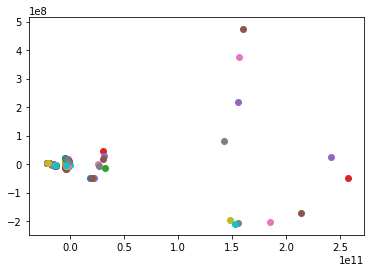

In [4]:
transformed_components = pca.transform(df[df.columns[14:]])
for i in range(len(transformed_components)):
    plt.scatter(transformed_components[i][0],transformed_components[i][1])
plt.show()





169


In [27]:

transformed_components = np.array(transformed_components)
x = transformed_components[:,0]
y = transformed_components[:,1]
label = df.ID.values
colours = bokeh.palettes.viridis(len(set(df.Mask.values)))
colour_dict = {}
for value in list(set(df.Mask.values)):
    colour_dict[value] = colours[list(set(df.Mask.values)).index(value)]

colours_arr = []
for val in df.Mask.values:
    colours_arr.append(colour_dict[val])


from bokeh.palettes import Category20_20 as palette
import itertools
output_file("D:/pyradiomics_analysis/PCA.html")
hover = HoverTool(
    tooltips=[
        #("index", "$index"),
        #("(x,y)", "($x, $y)"),
        ("Patient_ID", "@_class"),
    ]
)
colors = itertools.cycle(palette)

a_dict = {}
for i in range(169):
    a_dict[df.Mask.values[i]]= []
for i in range(169):
    a_dict[df.Mask.values[i]].append([x[i],y[i],df["ID"][i]])
    
    
p = figure(title="Principle Component Analysis of Radiomic Features", x_axis_label='x', y_axis_label='y', tools=[hover,"lasso_select","pan","zoom_in","zoom_out","crosshair",])

for val in a_dict:
    print(a_dict[val])
    x = [i[0] for i in a_dict[val]]
    y = [i[1] for i in a_dict[val]]
    labels = [i[2] for i in a_dict[val]]
    data = dict(x=x,y=y,_class =labels)
    p.circle("x","y",source = data,color=next(colors))

show(p)

[[-20946343489.284782, 4313802.602039942, 'T03_2_0'], [-20903964605.49765, 4251965.640562835, 'T03_3_2'], [-20935431204.638474, 4297567.120267388, 'T03_4_6'], [-20921208352.13425, 4275983.63709556, 'T03_5_8'], [-20949859706.129417, 4323420.996352029, 'T03_6_10']]
[[-20856669741.823257, 4181380.8653067243, 'S08_2_0'], [-20831143694.02299, 4144823.0741175143, 'S08_3_2'], [-20845721579.08707, 4165748.72426783, 'S08_4_4'], [-20834439561.201244, 4150128.965073123, 'S08_5_8'], [-20843891474.420727, 4164849.1920394665, 'S08_6_10']]
[[-1306890438.8040013, 14968588.858654529, 'T07_2_0'], [-1500177206.6552277, 18457127.848252922, 'T07_3_1'], [-1133361470.5539048, 9548350.145560216, 'T07_4_2'], [-1899327222.0461843, -5204039.803407067, 'T07_5_3'], [-1676847431.6089883, 7955148.6705725165, 'T07_6_4'], [-3234551672.813346, -5086259.279964289, 'T07_7_11'], [-3216119405.4359975, -4159720.1019262807, 'T07_8_18']]
[[155404830369.5526, 218721964.23981452, 'N11_2_0'], [160140353234.2853, 473773590.992893